# Aadesh Baral

# Task 4

# Stock Market Prediction using Numerical and Textual Analysis

● Create a hybrid model for stock price/performance prediction using
numerical analysis of historical stock prices, and sentimental analysis
of news headlines

● Stock to analyze and predict - SENSEX (S&P BSE SENSEX)

● Download historical stock prices from https://finance.yahoo.com

● Download textual (news) data from https://bit.ly/36fFPI6

● Use either R or Python, or both for separate analysis and then
combine the findings to create a hybrid model

● Depending on the accuracy of the model and quality of the task, we
will endorse your work and help you publish it.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import adam

%matplotlib inline

In [2]:
#Load Data
df_stock=pd.read_csv('^BSESN.csv')
df_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-10-13,26874.289063,26918.519531,26719.099609,26846.529297,26846.529297,10800.0
1,2015-10-14,26760.320313,26869.080078,26713.279297,26779.660156,26779.660156,10900.0
2,2015-10-15,26842.189453,27037.949219,26836.769531,27010.140625,27010.140625,12700.0
3,2015-10-16,27062.800781,27239.220703,26917.119141,27214.599609,27214.599609,10200.0
4,2015-10-19,27305.619141,27387.910156,27246.789063,27364.919922,27364.919922,8200.0


In [3]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1231 non-null   object 
 1   Open       1227 non-null   float64
 2   High       1227 non-null   float64
 3   Low        1227 non-null   float64
 4   Close      1227 non-null   float64
 5   Adj Close  1227 non-null   float64
 6   Volume     1227 non-null   float64
dtypes: float64(6), object(1)
memory usage: 67.4+ KB


In [4]:
df_stock.dropna(inplace=True)

In [5]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 0 to 1230
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1227 non-null   object 
 1   Open       1227 non-null   float64
 2   High       1227 non-null   float64
 3   Low        1227 non-null   float64
 4   Close      1227 non-null   float64
 5   Adj Close  1227 non-null   float64
 6   Volume     1227 non-null   float64
dtypes: float64(6), object(1)
memory usage: 76.7+ KB


In [6]:
df_close=df_stock.reset_index()['Close']

In [7]:
df_close

0       26846.529297
1       26779.660156
2       27010.140625
3       27214.599609
4       27364.919922
            ...     
1222    39574.570313
1223    39878.949219
1224    40182.671875
1225    40509.488281
1226    40593.800781
Name: Close, Length: 1227, dtype: float64

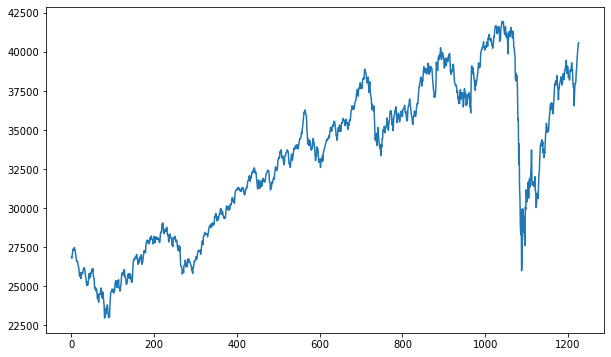

In [8]:
plt.figure(figsize=(10,6))
plt.plot(df_close)

In [9]:
#Scaling data in range of (0,1)
scaler=MinMaxScaler(feature_range=(0,1))
df_close=scaler.fit_transform(df_close.values.reshape(-1,1))

In [10]:
df_close

array([[0.20497555],
       [0.20145627],
       [0.21358631],
       ...,
       [0.90684828],
       [0.92404842],
       [0.92848574]])

In [11]:
training_set=int(len(df_close)*0.7)
testing_set=int(len(df_close)-training_set)
training_data,testing_data = df_close[0:training_set,:],df_close[training_set:len(df_close),:1]

In [12]:
def lstm_data(dataset,timestep=1):
    data_X,data_y=[],[]
    for i in range(len(dataset)-timestep-1):
        a=dataset[i:(i+timestep),0]
        data_X.append(a)
        data_y.append(dataset[i+timestep,0])
    return np.array(data_X),np.array(data_y)

In [13]:
timestep=150
X_train,y_train=lstm_data(training_data,timestep)
X_test,y_test=lstm_data(testing_data,timestep)

In [14]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [15]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(150,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150, 50)           10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 150, 50)           20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,verbose=1)


Train on 707 samples, validate on 218 samples
Epoch 1/200
707/707 [==============================] - 12s 17ms/step - loss: 0.0426 - val_loss: 0.0167
Epoch 2/200
707/707 [==============================] - 8s 12ms/step - loss: 0.0033 - val_loss: 0.0165
Epoch 3/200
707/707 [==============================] - 9s 12ms/step - loss: 0.0016 - val_loss: 0.0145
Epoch 4/200
707/707 [==============================] - 10s 14ms/step - loss: 0.0014 - val_loss: 0.0140
Epoch 5/200
707/707 [==============================] - 10s 15ms/step - loss: 0.0014 - val_loss: 0.0135
Epoch 6/200
707/707 [==============================] - 10s 14ms/step - loss: 0.0014 - val_loss: 0.0135
Epoch 7/200
707/707 [==============================] - 10s 15ms/step - loss: 0.0015 - val_loss: 0.0126
Epoch 8/200
707/707 [==============================] - 10s 15ms/step - loss: 0.0015 - val_loss: 0.0122
Epoch 9/200
707/707 [==============================] - 11s 16ms/step - loss: 0.0013 - val_loss: 0.0115
Epoch 10/200
707/707 [======

707/707 [==============================] - 9s 13ms/step - loss: 4.5714e-04 - val_loss: 0.0088
Epoch 76/200
707/707 [==============================] - 9s 13ms/step - loss: 6.1806e-04 - val_loss: 0.0040
Epoch 77/200
707/707 [==============================] - 10s 14ms/step - loss: 4.4168e-04 - val_loss: 0.0027
Epoch 78/200
707/707 [==============================] - 9s 12ms/step - loss: 4.6112e-04 - val_loss: 0.0036
Epoch 79/200
707/707 [==============================] - 9s 12ms/step - loss: 4.2255e-04 - val_loss: 0.0027
Epoch 80/200
707/707 [==============================] - 8s 12ms/step - loss: 4.2757e-04 - val_loss: 0.0038
Epoch 81/200
707/707 [==============================] - 8s 12ms/step - loss: 4.3358e-04 - val_loss: 0.0023
Epoch 82/200
707/707 [==============================] - 8s 12ms/step - loss: 3.9788e-04 - val_loss: 0.0023
Epoch 83/200
707/707 [==============================] - 8s 12ms/step - loss: 4.3671e-04 - val_loss: 0.0028
Epoch 84/200
707/707 [===========================

Epoch 151/200
707/707 [==============================] - 10s 15ms/step - loss: 2.7520e-04 - val_loss: 0.0012
Epoch 152/200
707/707 [==============================] - 11s 15ms/step - loss: 2.1791e-04 - val_loss: 0.0017
Epoch 153/200
707/707 [==============================] - 9s 13ms/step - loss: 2.6675e-04 - val_loss: 0.0013
Epoch 154/200
707/707 [==============================] - 9s 12ms/step - loss: 2.0989e-04 - val_loss: 0.0013
Epoch 155/200
707/707 [==============================] - 9s 12ms/step - loss: 2.3502e-04 - val_loss: 0.0013
Epoch 156/200
707/707 [==============================] - 9s 12ms/step - loss: 1.7001e-04 - val_loss: 0.0013
Epoch 157/200
707/707 [==============================] - 9s 13ms/step - loss: 1.8351e-04 - val_loss: 0.0013
Epoch 158/200
707/707 [==============================] - 9s 13ms/step - loss: 1.9011e-04 - val_loss: 0.0012
Epoch 159/200
707/707 [==============================] - 9s 12ms/step - loss: 2.8537e-04 - val_loss: 0.0017
Epoch 160/200
707/707 [===

In [18]:
test_predict=model.predict(X_test)
test_predict=scaler.inverse_transform(test_predict)
y_test=scaler.inverse_transform(y_test.reshape(-1,1))
print(np.sqrt(mean_squared_error(y_test,test_predict)))

683.8376904689023


In [19]:
train_predict=model.predict(X_train)
train_predict=scaler.inverse_transform(train_predict)
y_train=scaler.inverse_transform(y_train.reshape(-1,1))
print(np.sqrt(mean_squared_error(y_train,train_predict)))

239.78537736504015


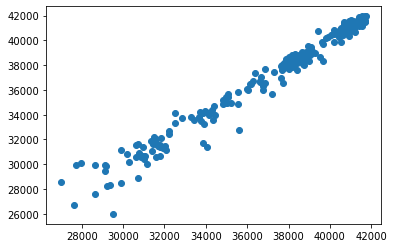

In [33]:
plt.scatter(x=test_predict,y=y_test)

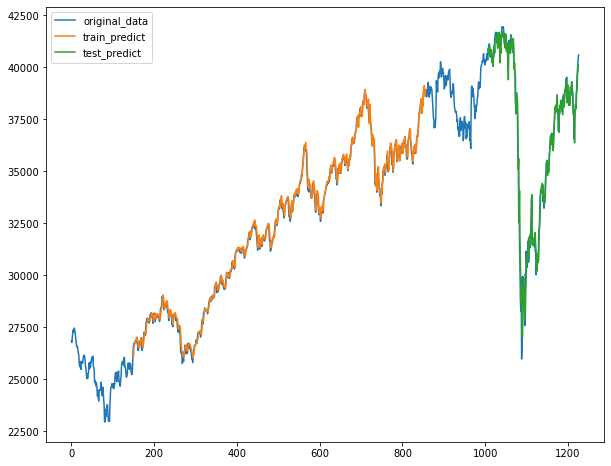

In [20]:
look_back=150
trainPredictPlot=np.empty_like(df_close)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :]=train_predict
testPredictPlot=np.empty_like(df_close)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_close)-1, :]=test_predict
plt.figure(figsize=(10,8))
plt.plot(scaler.inverse_transform(df_close),label='original_data')
plt.plot(trainPredictPlot,label='train_predict')
plt.plot(testPredictPlot,label='test_predict')
plt.legend()

# Textual_data